In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od

In [ ]:
url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitro117
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:21<00:00, 133MB/s]


In [ ]:
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
xtrain_gen = image_dataset_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",image_size=(256, 256))
xvalid_gen = image_dataset_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

xtrain_gen = xtrain_gen.map(lambda image,label:(rescale(image),label))
xvalid_gen  = xvalid_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
images, labels = next(iter(xtrain_gen))
first_image = images[2]

print(first_image.numpy())

[[[0.74509805 0.6509804  0.63529414]
  [0.7176471  0.62352943 0.60784316]
  [0.69803923 0.6039216  0.5882353 ]
  ...
  [0.64705884 0.5764706  0.5686275 ]
  [0.72156864 0.6509804  0.6431373 ]
  [0.7137255  0.6431373  0.63529414]]

 [[0.6392157  0.54509807 0.5294118 ]
  [0.64705884 0.5529412  0.5372549 ]
  [0.67058825 0.5764706  0.56078434]
  ...
  [0.7294118  0.65882355 0.6509804 ]
  [0.7960785  0.7254902  0.7176471 ]
  [0.79215693 0.72156864 0.7137255 ]]

 [[0.6901961  0.59607846 0.5803922 ]
  [0.7019608  0.60784316 0.5921569 ]
  [0.73333335 0.6392157  0.62352943]
  ...
  [0.76470596 0.69411767 0.6862745 ]
  [0.7803922  0.70980394 0.7019608 ]
  [0.7490196  0.6784314  0.67058825]]

 ...

 [[0.05882353 0.07058824 0.09803922]
  [0.0627451  0.07450981 0.10196079]
  [0.0627451  0.07450981 0.10196079]
  ...
  [0.74509805 0.67058825 0.6784314 ]
  [0.72156864 0.64705884 0.654902  ]
  [0.83921576 0.76470596 0.7725491 ]]

 [[0.0627451  0.07450981 0.10196079]
  [0.0627451  0.07450981 0.10196079]


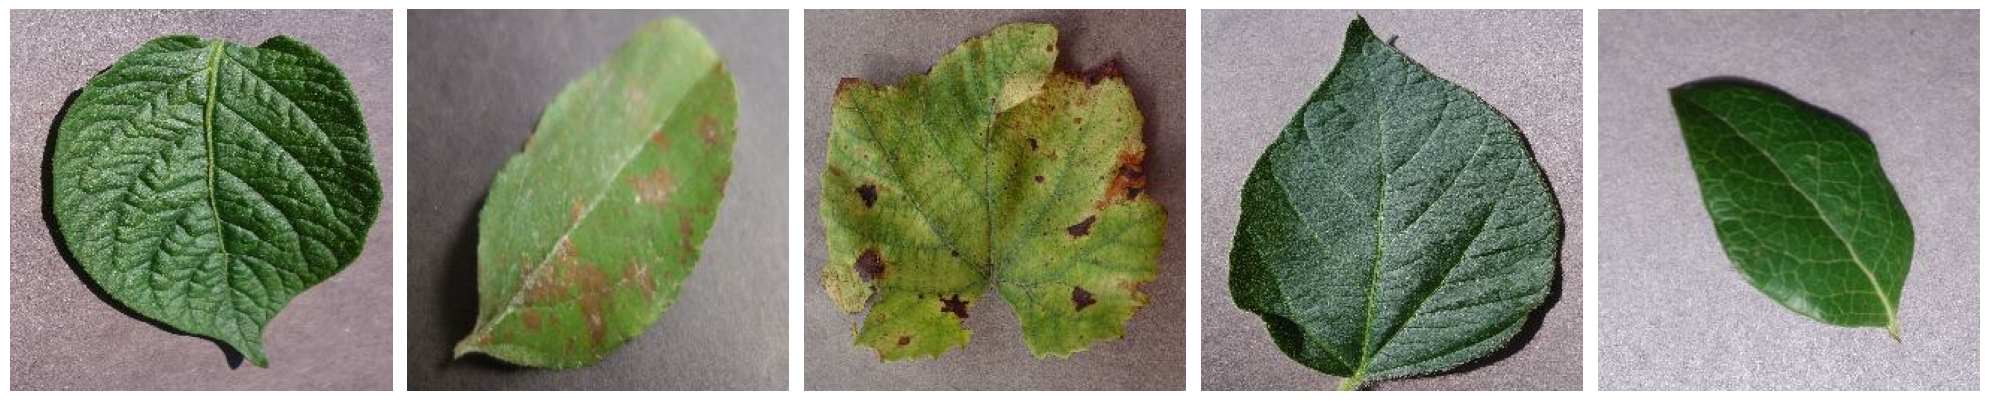

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(dataset, n_images):
    output = next(iter(dataset.take(n_images)))
    images = output[0].numpy()
    labels = output[1].numpy()

    fig, axes = plt.subplots(1, n_images, figsize=(20, 20))
    axes = axes.flatten()
    for img, lbl, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some images from the training set
plot_images(xtrain_gen, 5)


In [ ]:
print("Number of training batches: ", tf.data.experimental.cardinality(xtrain_gen))
print("Image shape: ", next(iter(xtrain_gen.take(1)))[0].shape)
print("Unique labels: ", np.unique(next(iter(xtrain_gen.take(1)))[1]))


Number of training batches:  tf.Tensor(2197, shape=(), dtype=int64)
Image shape:  (32, 256, 256, 3)
Unique labels:  [ 0  1  2  3  5 10 11 12 13 14 15 16 17 20 21 22 23 26 27 30 31 33 34 35
 36 37]


In [ ]:
import os

class_names = sorted(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

print(f'The total number of classes is: {len(class_names)}')


for class_name in class_names:
    print(class_name)

The total number of classes is: 38
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_viru

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add

'''TRHIS IS RESNET 50'''

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, GlobalAveragePooling2D, Dense

def identity_block(x, filters):
    # Identity block with skip connection
    x_copy = x

    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, x_copy])
    x = ReLU()(x)

    return x

def convolutional_block(x, filters, strides=2):

    x_copy = x

    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    x_copy = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(x_copy)
    x_copy = BatchNormalization()(x_copy)

    x = Add()([x, x_copy])
    x = ReLU()(x)

    return x

def create_resnet50(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, filters=64, strides=1)
    x = identity_block(x, filters=64)
    x = convolutional_block(x, filters=128)
    x = identity_block(x, filters=128)
    x = convolutional_block(x, filters=256)
    x = identity_block(x, filters=256)
    x = convolutional_block(x, filters=512)
    x = identity_block(x, filters=512)

    x = GlobalAveragePooling2D()(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model



input_shape = (256, 256, 3)
num_classes = 38
resnet50_model = create_resnet50(input_shape, num_classes)
resnet50_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 128, 128, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_42 (Ba  (None, 128, 128, 64)         256       ['conv2d_42[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_34 (ReLU)             (None, 128, 128, 64)         0         ['batch_normalization_42

"def identity_block(x, filters):\n    x_copy = x\n\n    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)\n    x = BatchNormalization()(x)\n    x = ReLU()(x)\n\n    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)\n    x = BatchNormalization()(x)\n\n    x = Add()([x, x_copy])\n    x = ReLU()(x)\n\n    return x\n\ndef create_resnet(input_shape, num_classes):\n    input_layer = Input(shape=input_shape)\n\n    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_layer)\n    x = BatchNormalization()(x)\n    x = ReLU()(x)\n\n    x = identity_block(x, filters=64)\n    x = identity_block(x, filters=64)\n\n    x = tf.keras.layers.GlobalAveragePooling2D()(x)\n    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)\n\n    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)\n    return model\n\nresnet_model = create_resnet(input_shape, num_classes)"

In [ ]:
resnet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ep = 6
history = resnet50_model.fit(xtrain_gen , validation_data=xvalid_gen, epochs=ep)

Epoch 1/6
2197/2197 [==============================] - 364s 160ms/step - loss: 0.8504 - accuracy: 0.7392 - val_loss: 1.1519 - val_accuracy: 0.6570
Epoch 2/6
2197/2197 [==============================] - 337s 153ms/step - loss: 0.2772 - accuracy: 0.9083 - val_loss: 0.8811 - val_accuracy: 0.7596
Epoch 3/6
2197/2197 [==============================] - 336s 153ms/step - loss: 0.1747 - accuracy: 0.9417 - val_loss: 0.7821 - val_accuracy: 0.7734
Epoch 4/6
2197/2197 [==============================] - 353s 161ms/step - loss: 0.1293 - accuracy: 0.9578 - val_loss: 0.5278 - val_accuracy: 0.8433
Epoch 5/6
2197/2197 [==============================] - 353s 160ms/step - loss: 0.1015 - accuracy: 0.9664 - val_loss: 0.4281 - val_accuracy: 0.8785
Epoch 6/6
2197/2197 [==============================] - 338s 154ms/step - loss: 0.0752 - accuracy: 0.9751 - val_loss: 0.1900 - val_accuracy: 0.9392


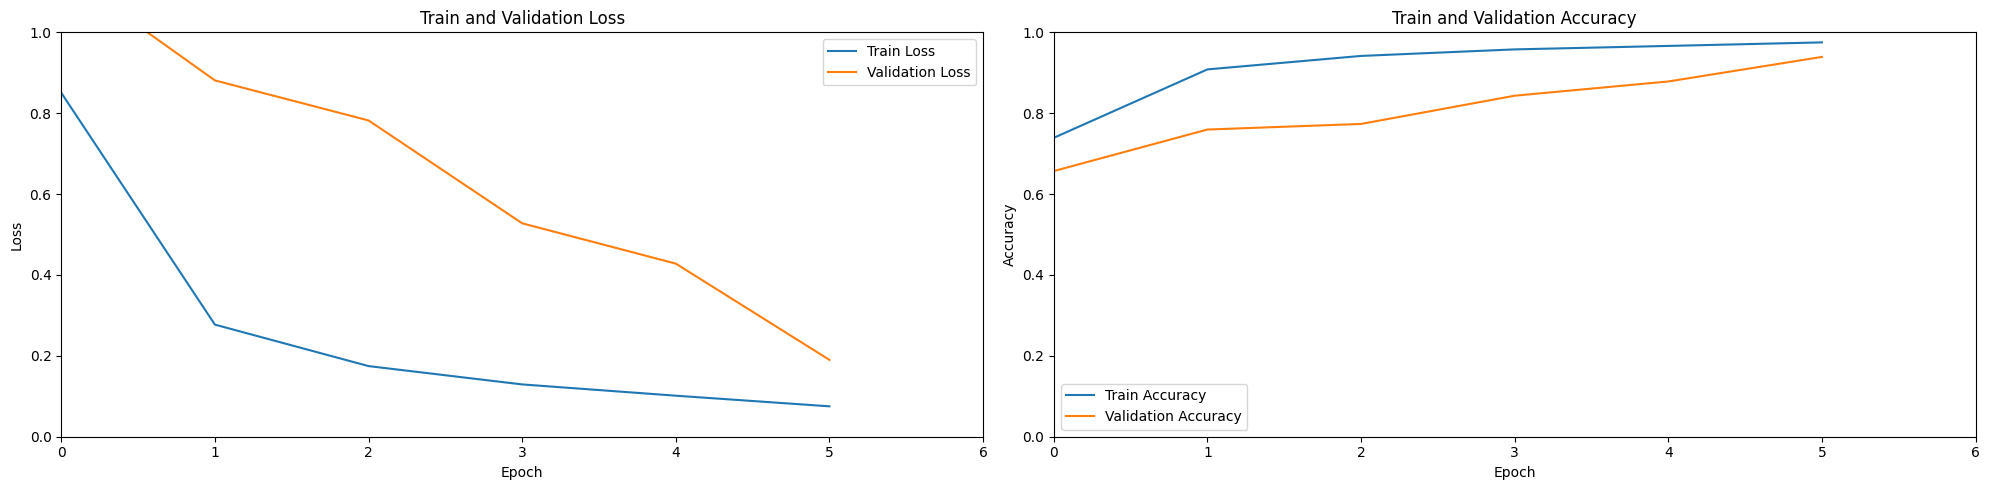

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 6)
plt.ylim(0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 6)
plt.ylim(0,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in xvalid_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(resnet50_model.predict(x),1).numpy())

1/1 [==============================] - 0s 399ms/step


In [ ]:
resnet50_model.save("Minor_Project_resnet50.h5")

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

<Figure size 2000x500 with 0 Axes>

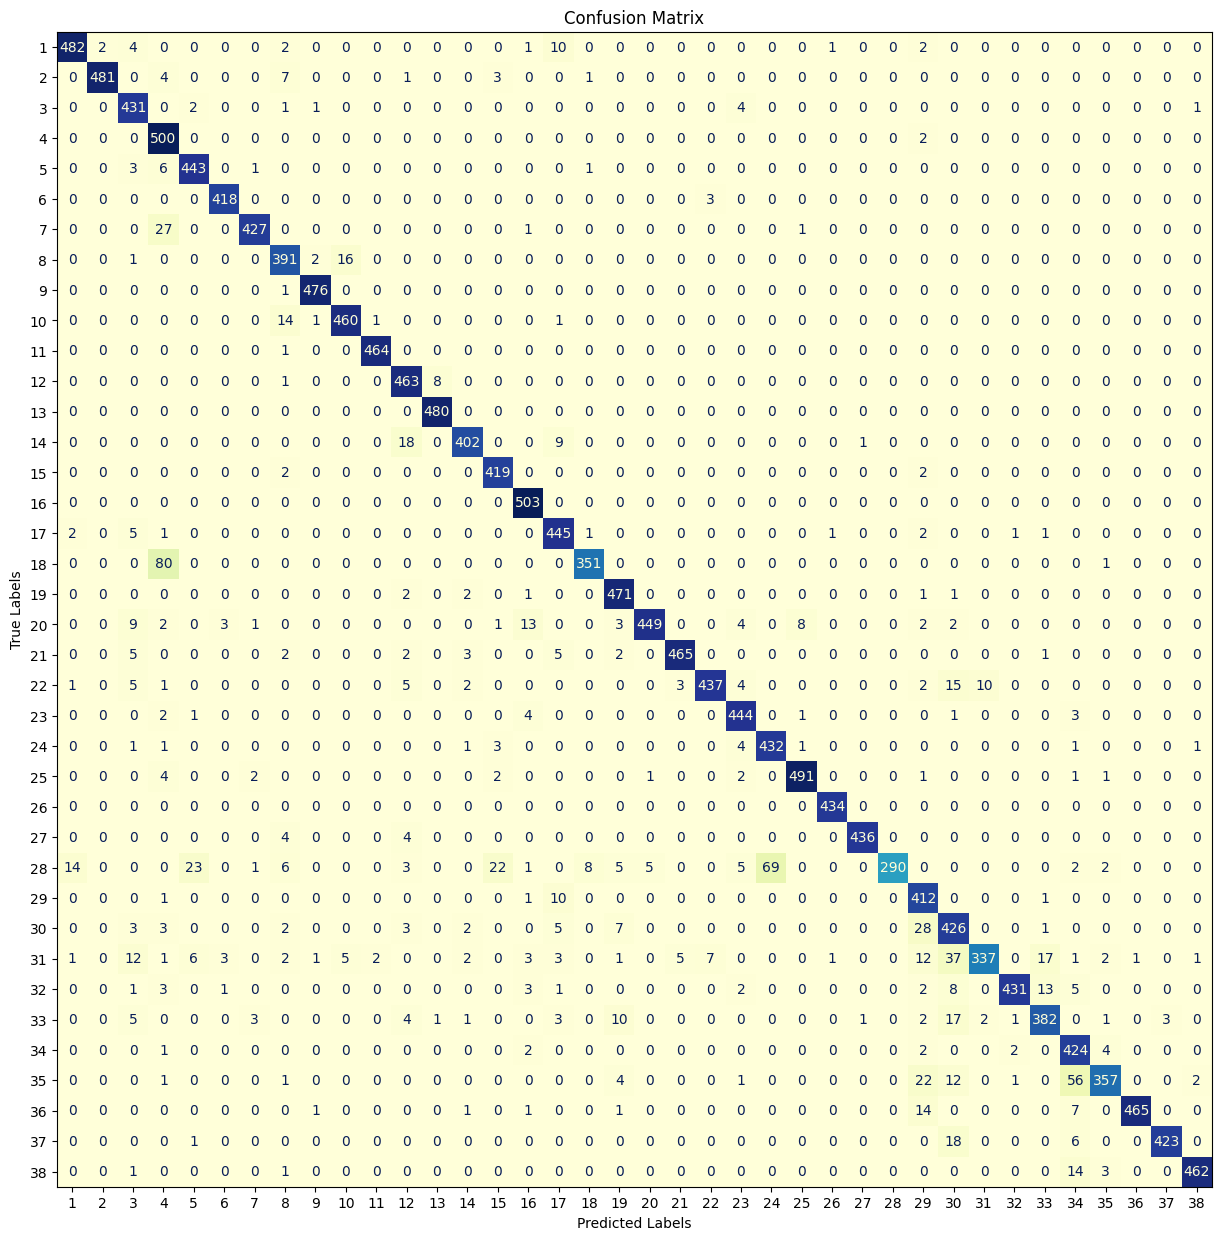

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from google.colab import files

In [ ]:
ul=files.upload()

Saving grey spot.jpg to grey spot.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

def preimg(image_path,target_size=(255,255)):
  img=load_img(image_path,target_size=target_size)
  x=img_to_array(img)
  x=x.astype('float32')/255.
  x=np.expand_dims(x,axis=0)
  return x

x=preimg('/content/grey spot.jpg')

In [ ]:
predictions=resnet50_model.predict(x)
predictions[0]

1/1 [==============================] - 1s 1s/step


array([2.58855923e-11, 1.06417999e-11, 1.78485681e-11, 8.61766290e-27,
       2.86162184e-21, 4.45372288e-22, 1.00066266e-25, 1.00000000e+00,
       1.24929478e-09, 1.85753604e-12, 2.77314808e-19, 8.72472020e-23,
       1.34918986e-13, 1.34748155e-29, 6.22074588e-20, 1.18490989e-29,
       7.84223855e-23, 8.10858995e-19, 8.15763258e-21, 2.52241680e-21,
       2.66765182e-20, 4.30397974e-25, 8.78423226e-15, 5.01811642e-18,
       4.27861785e-27, 1.06260604e-26, 1.32570558e-14, 6.11606036e-20,
       1.84800992e-22, 1.50801715e-18, 9.45092927e-22, 1.25194944e-28,
       4.76187713e-23, 1.26818108e-29, 2.87160051e-17, 2.58177906e-30,
       3.43692931e-20, 9.29759813e-21], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions)
print(f"this image : Predicted Class: {predicted_class}, Class name: {class_names[predicted_class]}")

this image : Predicted Class: 7, Class name: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
